# CA2 Statistical Techniques

### Task 1:
Load the dataset Q1.csv. It contains the exam scores (in percentages) of a sample of 50 students from a Dublin secondary school.

1. Find and comment on important summary statistics and produce an appropriate plot to summarise the dataset.
2. One of the teachers is concerned about the performance of the students in the school. She suspects that their performance may be below the reported national average of 70%. Does the data show that her concerns are justified? Use a significance level of alpha = 0.05.
3. Produce and comment on an appropriate plot to illustrate your findings.dings.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

#### Carregamento do Conjunto de Dados

In [2]:
df = pd.read_csv("Q1.csv")

In [3]:
df

,exam_score
0,74.54
1,66.20
2,86.75
3,70.87
4,80.43
5,73.16
6,81.30
7,71.37
8,65.35
9,80.05


#### summary statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   exam_score  50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


Existem 50 registros de uma variavel do tipo float64 na base de dados

In [5]:
df.isnull().sum()

exam_score    0
dtype: int64

In [6]:
df.describe()

,exam_score
count,50.000000
mean,68.735600
std,9.750143
min,48.730000
25%,62.040000
50%,68.390000
75%,74.630000
max,87.360000


#### Descricao dos dados
 - Mean = 68.7356
 - Std  = 9.75
 - Min Value = 48.73
 - Max Value = 87.36

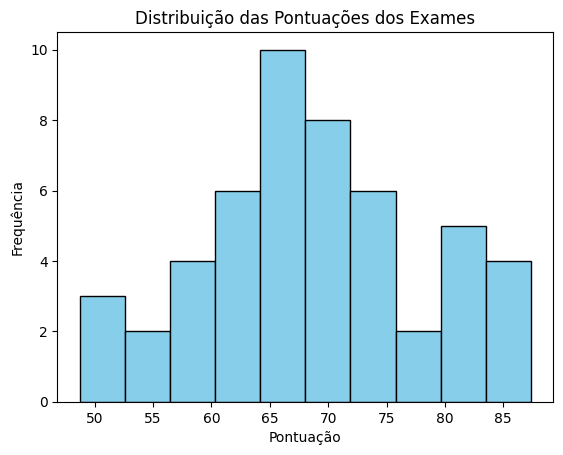

In [7]:
# Criando um histograma para visualizar a distribuição das pontuações
plt.hist(df['exam_score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribuição das Pontuações dos Exames')
plt.xlabel('Pontuação')
plt.ylabel('Frequência')
plt.show()

#### Teste de Hipótese
Para determinar se as preocupações do professor são justificadas, realizaremos o teste de hipótese:

1. **Hipóteses**:
   - Hipótese nula (H0): A média das notas é igual ou superior a 70%.
   - Hipótese alternativa (H1): A média das notas é inferior a 70%.

2. **Nível de significância (α)**: α = 0,05.

3. **Estatística de teste**: Utilizaremos o teste t de Student para uma amostra.

4. **Critério de decisão**: Se o valor-p (p-value) calculado for menor do que o nível de significância (α = 0,05), rejeitaremos a hipótese nula em favor da hipótese alternativa.

In [8]:
# Definindo a média nacional
mean_national = 70

# Definindo o nível de significância
alpha = 0.05

In [9]:
# Realizando o teste de hipótese
t_statistic, p_value = stats.ttest_1samp(df['exam_score'], mean_national)
p_value

0.36364597032062806

In [10]:
# Verificando se rejeitamos a hipótese nula
if p_value < alpha:
    print("Rejeitamos a hipótese nula. As notas médias são significativamente abaixo da média nacional de 70%.")
else:
    print("Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que as notas médias são abaixo da média nacional de 70%.")

Não rejeitamos a hipótese nula. Não há evidências suficientes para afirmar que as notas médias são abaixo da média nacional de 70%.
